# Библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st

# Выявление закономерностей определяющих успешность виртуальных игр.

# Описание проекта

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Доступны данные до 2016 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# Описание данных

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

## Изучение данных из файла

In [2]:
df = pd.read_csv('/datasets/games.csv')
display(df.head(10))
df.info()
df.describe(include='all')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
count,16713,16715,16446.000000,16713,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000,10014,9949
unique,11559,31,NaN,12,NaN,NaN,NaN,NaN,NaN,96,8
top,Need for Speed: Most Wanted,PS2,NaN,Action,NaN,NaN,NaN,NaN,NaN,tbd,E
freq,12,2161,NaN,3369,NaN,NaN,NaN,NaN,NaN,2424,3990
mean,NaN,NaN,2006.484616,NaN,0.263377,0.145060,0.077617,0.047342,68.967679,NaN,NaN
std,NaN,NaN,5.877050,NaN,0.813604,0.503339,0.308853,0.186731,13.938165,NaN,NaN
min,NaN,NaN,1980.000000,NaN,0.000000,0.000000,0.000000,0.000000,13.000000,NaN,NaN
25%,NaN,NaN,2003.000000,NaN,0.000000,0.000000,0.000000,0.000000,60.000000,NaN,NaN
50%,NaN,NaN,2007.000000,NaN,0.080000,0.020000,0.000000,0.010000,71.000000,NaN,NaN
75%,NaN,NaN,2010.000000,NaN,0.240000,0.110000,0.040000,0.030000,79.000000,NaN,NaN


Приведём названия столбцов к нижнему регистру:

In [3]:
df.set_axis(df.columns.str.lower(),axis = 'columns',inplace = True)
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Определим количество и проценты пропусков в таблице:

In [4]:
print('Количество пропусков в таблице:')
display(df.isna().sum())
print()
print('Процент пропусков в таблице:')
(df.isna().mean()*100).round(2)

Количество пропусков в таблице:


name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


Процент пропусков в таблице:


name                0.01
platform            0.00
year_of_release     1.61
genre               0.01
na_sales            0.00
eu_sales            0.00
jp_sales            0.00
other_sales         0.00
critic_score       51.32
user_score         40.09
rating             40.48
dtype: float64

В солбце Year_of_Release присутствуют пропуски, которые можно заполнить по медианным/средним значениям подобных по другим признакам игр. Пропуски в critic_score, user_score и rating присутствую в 40-50% всей таблицы. Самое частое значение (кроме NaN) в столбце user_score - tbd (Аббревиатура от английского To Be Determined (будет определено). Используется, если какая-то информация еще не определена или решение по вопросу не принято.) Предположив, что игры без оценки user_score, как и игры пока не получившие оценку user_score являются наименее популярными, данное значение можно заменить на наименьшее ('0').

## Подготовка данных

Учитывая, что пропуски в данных по продажам отсутствуют, создадим столбец с сумарными продажами во всех регионах:

In [5]:
df['sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df[['sales']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 1 columns):
sales    16715 non-null float64
dtypes: float64(1)
memory usage: 130.7 KB


Проверим df на явные дубликаты и избавимся от них:

In [6]:
duplicats = df[df.duplicated(
    subset=['name', 'platform', 'year_of_release'], keep=False
)].sort_values('name')
duplicats

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E,2.56
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E,0.01
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN,2.39
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN,0.03


In [7]:
df.loc[[604, 16230], 'eu_sales'] = df.loc[[604, 16230], 'eu_sales'].sum()
df.loc[[604, 16230], 'sales'] = df.loc[[604, 16230], 'eu_sales'].sum()
# Сохраним суммарные значения eu_sales и sales для 604 и 16230 строк, 
# предположив, что суммарные продажи дубликатов отражают фактические продажи.

df = df.drop_duplicates(subset=['name', 'platform', 'year_of_release']).reset_index(drop = True)

print('Количество явных дубликатов по name, platform и year_of_release:')
len(df[df.duplicated(subset=['name', 'platform', 'year_of_release'])])

Количество явных дубликатов по name, platform и year_of_release:


0

Избавимся от строки с пропуском в name (а так же в genre):

In [8]:
df = df[~(df['name'].isna())]# Мне кажется, так удобнее чем dropna ) .
print('Количество пропусков в таблице:')
df[['name', 'genre']].isna().sum()

Количество пропусков в таблице:


name     0
genre    0
dtype: int64

Приведём значения user_score к типу float64 (как в critic_score), для этого сначала изменим значения tbd на пропуски типа float64, а затем, если остальные значения корректны, приведём к типу float64 все значения user_score:

In [9]:
df.loc[(df['user_score'] == 'tbd'), 'user_score'] = pd.to_numeric(
    df.loc[(df['user_score'] == 'tbd'), 'user_score'], errors='coerce'
)

try:
    df['user_score'] = pd.to_numeric(df['user_score'])
except:
    print('Значения НЕ корректны для приведения к типу float64!')
    
df[['user_score']].info()
print()
print('Количество пропусков в таблице:')
display(df['user_score'].isna().sum())
print()
print('Процент пропусков в таблице:')
(df['user_score'].isna().mean()*100).round(2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16712 entries, 0 to 16712
Data columns (total 1 columns):
user_score    7589 non-null float64
dtypes: float64(1)
memory usage: 261.1 KB

Количество пропусков в таблице:


9123


Процент пропусков в таблице:


54.59

Заменим пропуски в critic_score и user_score на среднее значение оценки игр с такой же (+/- 10%) продаваимостью и на той же платформе:

In [10]:
for platform in df[df['critic_score'].isna()]['platform'].unique():
    for sales in df[(df['critic_score'].isna()) & (df['platform'] == platform
                                                  )]['sales'].unique():
        df.loc[(df['critic_score'].isna()) & 
               (df['platform'] == platform) &
               (df['sales'] == sales), 'critic_score'] = (
        df[(df['platform'] == platform) &
           (df['sales'] > sales*.9) & 
           (df['sales'] < sales*1.1)
           ]['critic_score'].mean()
        )

for platform in df[df['user_score'].isna()]['platform'].unique():
    for sales in df[(df['user_score'].isna()) & (df['platform'] == platform
                                                )]['sales'].unique():
        df.loc[(df['user_score'].isna()) &
               (df['platform'] == platform) &
               (df['sales'] == sales), 'user_score'] = (
        df[(df['platform'] == platform) &
           (df['sales'] > sales*.9) & 
           (df['sales'] < sales*1.1)
           ]['user_score'].mean()
        )

df[['critic_score', 'user_score']].info()
print()
print('Количество пропусков в таблице:')
display(df[['critic_score', 'user_score']].isna().sum())
print()
print('Процент пропусков в таблице:')
(df[['critic_score', 'user_score']].isna().mean()*100).round(2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16712 entries, 0 to 16712
Data columns (total 2 columns):
critic_score    15527 non-null float64
user_score      15477 non-null float64
dtypes: float64(2)
memory usage: 391.7 KB

Количество пропусков в таблице:


critic_score    1185
user_score      1235
dtype: int64


Процент пропусков в таблице:


critic_score    7.09
user_score      7.39
dtype: float64

Для замены оставшихся пропусков применим тот же фильтр, только sales= +/- 20% и без учёта платформы:

In [11]:
for sales in df[df['critic_score'].isna()]['sales'].unique():
    df.loc[(df['critic_score'].isna()) &
           (df['sales'] == sales), 'critic_score'] = (
        df[(df['sales'] > sales*.8) & 
           (df['sales'] < sales*1.2)
           ]['critic_score'].mean()
        )

for sales in df[df['user_score'].isna()]['sales'].unique():
    df.loc[(df['user_score'].isna()) &
           (df['sales'] == sales), 'user_score'] = (
        df[(df['sales'] > sales*.8) & 
           (df['sales'] < sales*1.2)
           ]['user_score'].mean()
        )

df[['critic_score', 'user_score']].info()
print()
print('Количество пропусков в таблице:')
display(df[['critic_score', 'user_score']].isna().sum())
df[df['user_score'].isna()]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16712 entries, 0 to 16712
Data columns (total 2 columns):
critic_score    16710 non-null float64
user_score      16710 non-null float64
dtypes: float64(2)
memory usage: 391.7 KB

Количество пропусков в таблице:


critic_score    2
user_score      2
dtype: int64

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
16674,G1 Jockey 4 2008,PS3,2008.0,Sports,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0
16707,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0


От оставшихся двух строк с пропусками в critic_score и user_score (а так же с нулевыми показателями продаж) можно избавиться:

In [12]:
df = df[~(df['user_score'].isna())]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16710 entries, 0 to 16712
Data columns (total 12 columns):
name               16710 non-null object
platform           16710 non-null object
year_of_release    16441 non-null float64
genre              16710 non-null object
na_sales           16710 non-null float64
eu_sales           16710 non-null float64
jp_sales           16710 non-null float64
other_sales        16710 non-null float64
critic_score       16710 non-null float64
user_score         16710 non-null float64
rating             9948 non-null object
sales              16710 non-null float64
dtypes: float64(8), object(4)
memory usage: 1.7+ MB


Разумно предположить что годы выпуска игр с одинаковыми названиями, но на разных платформах, вероятнее всего близки, или совпадают.

Заменим пропуски значений столбца year_of_release средним значениями year_of_release игр с таким же названием: 

In [13]:
for name in df[df['year_of_release'].isna()]['name']:
        df.loc[(df['year_of_release'].isna()) & (df['name'] == name), 'year_of_release'] = (
        df[df['name'] == name]['year_of_release'].mean()
    )
    
print('Количество пропусков в таблице:')
df[['year_of_release']].isna().sum()

Количество пропусков в таблице:


year_of_release    146
dtype: int64

Оставшиеся пропуски в year_of_release заменим на среднее значение year_of_release игр совпадающих по платформе и жанру, исходя из того, что каждый жанр платформам "даётся" с определённым уровнем качества и оценки бы соответствовали среднему значению оценок определённого жанра на определёной платформе:

In [14]:
for platform in df[df['year_of_release'].isna()]['platform'].unique():
    for genre in df[(df['platform'] == platform)]['genre'].unique():
        df.loc[(df['year_of_release'].isna()) &
               (df['platform'] == platform) & 
               (df['genre'] == genre), 'year_of_release'] = (
            df.loc[(df['platform'] == platform) &
                   (df['genre'] == genre), 'year_of_release'].mean()
            )
                    
df['year_of_release'] = df['year_of_release'].astype('int')               

print('Количество пропусков в таблице:')
print()
print(df[['year_of_release']].isna().sum())

Количество пропусков в таблице:

year_of_release    0
dtype: int64


Избавимся от пропусков в rating:

In [15]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Значения rating игр, не удостоинных вниманием организации ESRB, определим как "unrating":

In [16]:
df['rating'] = df['rating'].fillna('unrating')
df = df.reset_index(drop = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16710 entries, 0 to 16709
Data columns (total 12 columns):
name               16710 non-null object
platform           16710 non-null object
year_of_release    16710 non-null int64
genre              16710 non-null object
na_sales           16710 non-null float64
eu_sales           16710 non-null float64
jp_sales           16710 non-null float64
other_sales        16710 non-null float64
critic_score       16710 non-null float64
user_score         16710 non-null float64
rating             16710 non-null object
sales              16710 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


Таблица готова для анализа.

## Исследовательский анализ данных

Рассмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

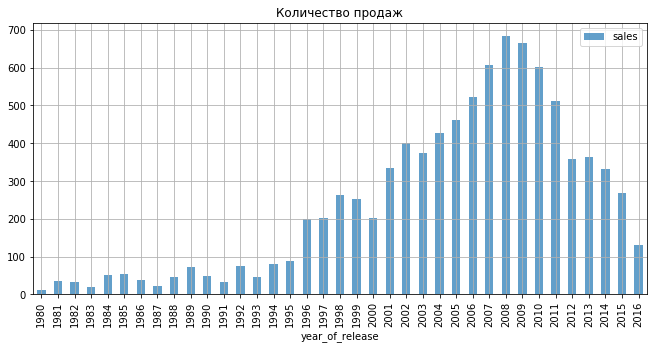

In [17]:
df.groupby('year_of_release').sum().reset_index().plot(
    kind='bar', 
    x='year_of_release', 
    y='sales', 
    figsize=(11, 5), 
    grid=True, 
    alpha=.7,
    linewidth=3,
    title='Количество продаж')

plt.show()

Объём продаваемых игр достиг современного уровня (не менее 200 миллионов копий в год) в 1996 году. Пик продаж приходится на 2008, 2009 годы. Исходя из показателя объёмов продаж значения до 1996 года можно считать неактуальными.

Рассмотрим, как менялись продажи по платформам. Определим платформы с наибольшими суммарными продажами (например: не менее 300 миллионов продаж) и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

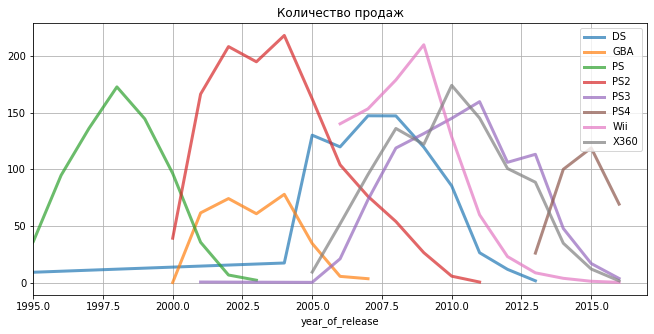

In [18]:
top_platforms = df.groupby('platform').sum().reset_index().query('sales > 300'
                                                               )['platform'].unique()

for platform in top_platforms:
    if platform == top_platforms[0]:
        ax = df[df['platform'] == platform].groupby('year_of_release').sum().reset_index().plot(
            kind='line',
            x='year_of_release', 
            y='sales', 
            xlim=(1995, 2017),
            linewidth=3,
            label=platform,
            title='Количество продаж',
            legend=True,
            alpha=.7)
    else:
        df[df['platform'] == platform].groupby('year_of_release').sum().reset_index().plot(
            kind='line', 
            x='year_of_release', 
            y='sales', 
            xlim=(1995, 2017),
            figsize=(11, 5), 
            grid=True, 
            alpha=.7,
            linewidth=3,
            label=platform,
            legend=True,
            ax = ax)

plt.show()

Из графика видно, что платформы с наиболшими продажами появлялись: по две платформы до 1996 года и в 2000 году, по одной платформе в 2001, 2005, 2006, 2013. Из чего можно сделать вывод, что топовые платформы появляются на рынке примерно раз в семь лет, причём сразу по две!

Платформы с наибольшими продажами исчезали: в 2003, 2007, 2011, 2013.

Так же можно определить, что средний срок жизни топовой платформы составляет около 10 лет, пик продаж не всегда приходится на середину срока, но всегда составляет около 5 лет. А из этого, в свою очередь, можно сделать вывод, что ещё три платформы в ближайший срок могут прекратить своё существование, а вот PS4 сейчас "на подъёме".

Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.

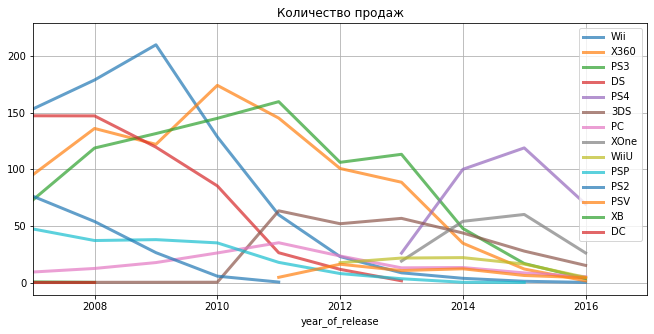

In [19]:
# Возьмём период за последние 9 лет (с 2007 года).
new_platforms = df.query('year_of_release > 2007')['platform'].unique()

for platform in new_platforms:
    if platform == new_platforms[0]:
        ax = df[df['platform'] == platform].groupby('year_of_release').sum().reset_index().plot(
            kind='line',
            x='year_of_release', 
            y='sales', 
            xlim=(2007, 2017),
            linewidth=3,
            label=platform,
            title='Количество продаж',
            legend=True,
            alpha=.7)
    else:
        df[df['platform'] == platform].groupby('year_of_release').sum().reset_index().plot(
            kind='line', 
            x='year_of_release', 
            y='sales', 
            xlim=(2007, 2017),
            figsize=(11, 5), 
            grid=True, 
            alpha=.7,
            linewidth=3,
            label=platform,
            legend=True,
            ax = ax)

plt.show()

На графике явно выделяются две платформы PS4 и XOne, появление обеих на рынке произошло три года назад, их продажи уже значительно превосходят продажи остальных участников. Учитывая, что данные за 2016 год могут быть неполными, снижение продаж в 2016 году будем считать не соответствующим действительности.

Самые потенциально прибыльные платформы: PS4 и XOne.

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.

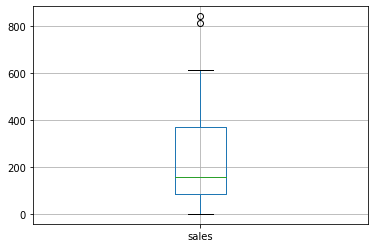

In [20]:
df[df['year_of_release'] > 2007].groupby('platform').sum().boxplot(column='sales')
plt.show()

График показал, что общии продажи большинства платформ не превышают 600 миллионов, и только 2 платформы смогли совершить более 600 миллионов продаж. Количество продаж у таких платформ примерно в 4 раза выше медианного значения. Причём, обе платформы преодолели барьер в 600 миллионов минимум на 200 миллионов! Если среди лидеров продаж есть платформы продолжающие выпуск игр, значит их финальная сумма продаж будет ещё выше. Смещение медианы вниз означает, что продажи большей части платформ ниже среднего.

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

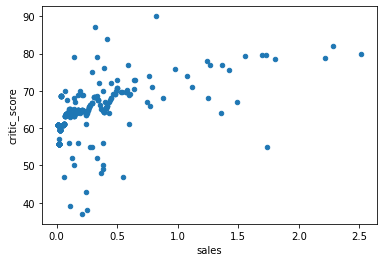

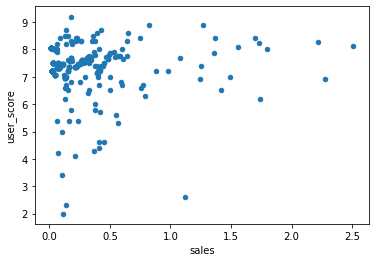

Коэффициент корреляции между отзывами critic_score и продажами платформы PS2:
0.46

Коэффициент корреляции между отзывами user_score и продажами платформы PS2:
0.2


In [21]:
df.query('year_of_release > 2007').loc[df['platform'] == 'PS2'].plot(
    x='sales', y='critic_score', kind='scatter')
plt.show()
df.query('year_of_release > 2007').loc[df['platform'] == 'PS2'].plot(
    x='sales', y='user_score', kind='scatter')
plt.show()
print('Коэффициент корреляции между отзывами critic_score и продажами платформы PS2:')
print(df[df['platform'] == 'PS2']['critic_score'].corr(df[df['platform'] == 'PS2']['sales']
                                                      ).round(2))
print()
print('Коэффициент корреляции между отзывами user_score и продажами платформы PS2:')
print(df[df['platform'] == 'PS2']['user_score'].corr(df[df['platform'] == 'PS2']['sales']
                                                    ).round(2))

По диаграммам рассеивания видно, что и с высоким, и с низким рейтингом игры не всегда достигают больших результатов в продажах, но чем выше продажи, тем меньше среди таких игр встречается низкий рейтинг, самые продаваемые игры имеют только высокие рейтинги.

Коэффициент корреляции показал, что отзывы критиков в большей степени, чем отзывы игроков, отражают зависимость оценки и продаваемости игры.

Соотнесём выводы с продажами игр на других платформах:

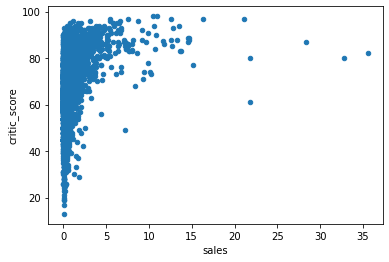

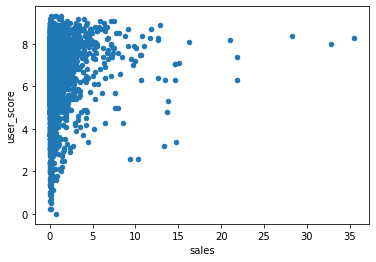

Коэффициент корреляции между отзывами critic_score и продажами всех платформ, кроме PS2:
0.29

Коэффициент корреляции между отзывами user_score и продажами всех платформ, кроме PS2:
0.11


In [22]:
df.query('year_of_release > 2007').loc[~(df['platform'] == 'PS2')].plot(
    x='sales', y='critic_score', kind='scatter')
plt.show()
df.query('year_of_release > 2007').loc[~(df['platform'] == 'PS2')].plot(
    x='sales', y='user_score', kind='scatter')
plt.show()
print(('Коэффициент корреляции между отзывами critic_score и продажами всех платформ, кроме PS2:'))
print(df[~(df['platform'] == 'PS2')]['critic_score'].corr(df[~(df['platform'] == 'PS2')]['sales']
                                                      ).round(2))
print()
print('Коэффициент корреляции между отзывами user_score и продажами всех платформ, кроме PS2:')
print(df[~(df['platform'] == 'PS2')]['user_score'].corr(df[~(df['platform'] == 'PS2')]['sales']
                                                    ).round(2))

На примере остальных платформ общая тенденция зависимости отзывов и продаж сохранена, но более "размыта", Коэффициенты корреляции показывают наличие зависимости, но в меньшей степени.

Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами? (На примере 10 самых продаваемых жанров.)

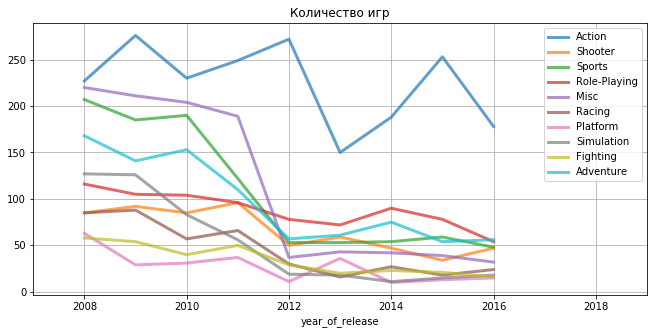

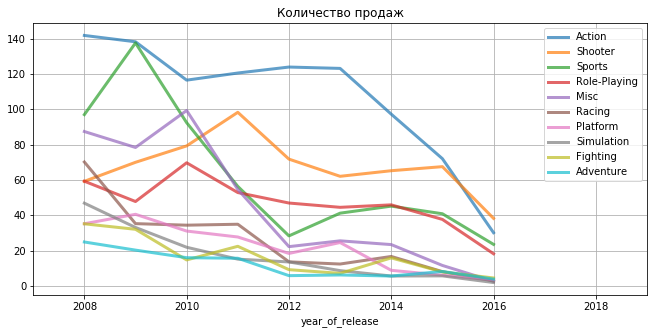

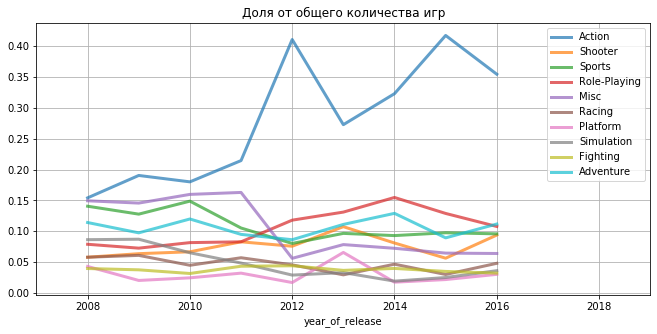

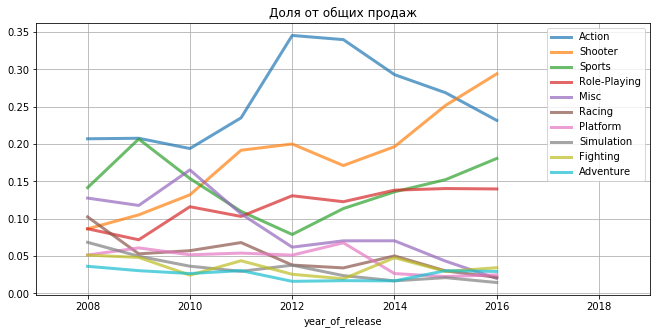

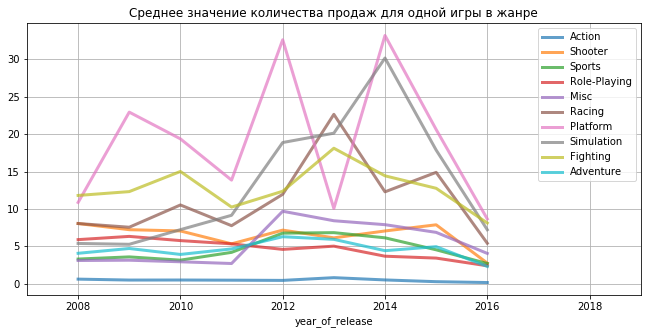

In [23]:
genres = df.query('year_of_release > 2007').groupby(
    'genre').sum().reset_index().sort_values(
    by='sales', ascending=False)['genre'].unique()[:10]
# Чтобы порядок в label отражал порядок убывания по продажам.

for genre in genres:
    if genre == genres[0]:
        ax = df.query('year_of_release > 2007').loc[df['genre'] == genre].groupby(
            'year_of_release').count().reset_index().plot(
            kind='line',
            x='year_of_release', 
            y='name', 
            linewidth=3,
            label=genre,
            title='Количество игр',
            alpha=.7)
    else:
        df.query('year_of_release > 2007').loc[df['genre'] == genre].groupby(
            'year_of_release').count().reset_index().plot(
            kind='line', 
            x='year_of_release', 
            y='name', 
            figsize=(11, 5), 
            xlim=(2007, 2019),
            grid=True, 
            alpha=.7,
            linewidth=3,
            label=genre,
            ax = ax)

plt.show()

for genre in genres:
    if genre == genres[0]:
        ax = df.query('year_of_release > 2007').loc[df['genre'] == genre].groupby(
            'year_of_release').sum().reset_index().plot(
            kind='line',
            x='year_of_release', 
            y='sales', 
            linewidth=3,
            label=genre,
            title='Количество продаж',
            alpha=.7)
    else:
        df.query('year_of_release > 2007').loc[df['genre'] == genre].groupby(
            'year_of_release').sum().reset_index().plot(
            kind='line', 
            x='year_of_release', 
            y='sales', 
            figsize=(11, 5), 
            xlim=(2007, 2019),
            grid=True, 
            alpha=.7,
            linewidth=3,
            label=genre,
            ax = ax)

plt.show()

for genre in genres:
    if genre == genres[0]:
        data = df.query('year_of_release > 2007').loc[df['genre'] == genre].groupby(
            'year_of_release').count().reset_index()
        for year in data['year_of_release'].unique():
            data.loc[data['year_of_release'] == year, 'ratio'] = (
                data.loc[data['year_of_release'] == year, 'name'] / (
                    df[df['year_of_release'] == year]['name'].count()
                )
            )
        ax = data.plot(
            kind='line',
            x='year_of_release', 
            y='ratio', 
            linewidth=3,
            label=genre,
            title='Доля от общего количества игр',
            alpha=.7)
    else:
        data = df.query('year_of_release > 2007').loc[df['genre'] == genre].groupby(
            'year_of_release').count().reset_index()
        for year in data['year_of_release'].unique():
            data.loc[data['year_of_release'] == year, 'ratio'] = (
                data.loc[data['year_of_release'] == year, 'name'] / (
                    df[df['year_of_release'] == year]['name'].count()
                )
            )
        data.plot(
            kind='line', 
            x='year_of_release', 
            y='ratio', 
            xlim=(2007, 2019),
            figsize=(11, 5),
            grid=True,
            alpha=.7,
            linewidth=3,
            label=genre,
            ax = ax)

plt.show()

for genre in genres:
    if genre == genres[0]:
        data = df.query('year_of_release > 2007').loc[df['genre'] == genre].groupby(
            'year_of_release').sum().reset_index()
        for year in data['year_of_release'].unique():
            data.loc[data['year_of_release'] == year, 'ratio'] = (
                data.loc[data['year_of_release'] == year, 'sales'] / (
                    df[df['year_of_release'] == year]['sales'].sum()
                )
            )
        ax = data.plot(
            kind='line',
            x='year_of_release', 
            y='ratio', 
            linewidth=3,
            label=genre,
            title='Доля от общих продаж',
            alpha=.7)
    else:
        data = df.query('year_of_release > 2007').loc[df['genre'] == genre].groupby(
            'year_of_release').sum().reset_index()
        for year in data['year_of_release'].unique():
            data.loc[data['year_of_release'] == year, 'ratio'] = (
                data.loc[data['year_of_release'] == year, 'sales'] / (
                    df[df['year_of_release'] == year]['sales'].sum()
                )
            )
        data.plot(
            kind='line', 
            x='year_of_release', 
            y='ratio', 
            xlim=(2007, 2019),
            figsize=(11, 5),
            grid=True,
            alpha=.7,
            linewidth=3,
            label=genre,
            ax = ax)

plt.show()

for genre in genres:
    if genre == genres[0]:
        data = df.query('year_of_release > 2007').loc[df['genre'] == genre].groupby(
            'year_of_release').count().reset_index()
        for year in data['year_of_release'].unique():
            data.loc[data['year_of_release'] == year, 'ratio'] = (
                df[(df['year_of_release'] == year) & (df['genre'] == genre)]['sales'].sum() / (
                    data.loc[data['year_of_release'] == year, 'sales']
                    )
                )
        ax = data.plot(
            kind='line',
            x='year_of_release', 
            y='ratio', 
            linewidth=3,
            label=genre,
            title='Среднее значение количества продаж для одной игры в жанре',
            alpha=.7)
    else:
        data = df.query('year_of_release > 2007').loc[df['genre'] == genre].groupby(
            'year_of_release').count().reset_index()
        for year in data['year_of_release'].unique():
            data.loc[data['year_of_release'] == year, 'ratio'] = (
                df[(df['year_of_release'] == year)]['sales'].sum() / (
                    data.loc[data['year_of_release'] == year, 'sales']
                    )
                )
        data.plot(
            kind='line', 
            x='year_of_release', 
            y='ratio', 
            xlim=(2007, 2019),
            figsize=(11, 5),
            grid=True,
            alpha=.7,
            linewidth=3,
            label=genre,
            ax = ax)

plt.show()


Самыми прибыльными жанрами за последние 5 лет являются: Action, Shooter, Sports и Role-Playing. В жанре Action выпускается наибольшее количество игр (в 2-3 раза больше, чем в любом другом), лидер продаж, однако доля продаж в этом жанре не всегда на много отличается от других (на примере Action и Shooter в 2015 году, или Action и Sports в 2009 году). Большое количесво разных игр в определённом жанре не подразумевает наибольшие продажи в этом жанре. Наибольшее среднее продаж для одной игры в жанре приходится на жанры Platform, Simulation, Racing и Fighting, каждый из которыж занимает менее 10% от общих продаж. Это означает, что в данных жанрах доля успешных игр выше, чем в других, при этом количество игр в данных жанрах гораздо меньше, чем в наиболее продаваемых.

## Портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):
* Самые популярные платформы (топ-5). Различия в долях продаж.
* Самые популярные жанры (топ-5).
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?

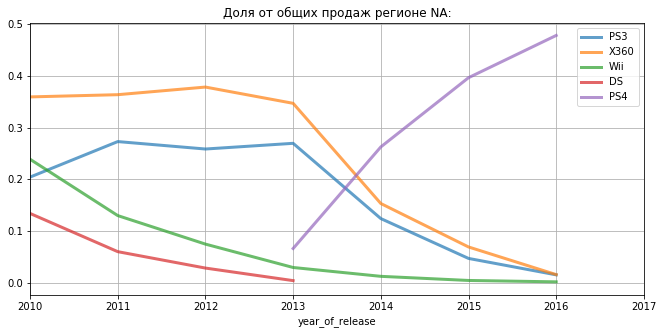

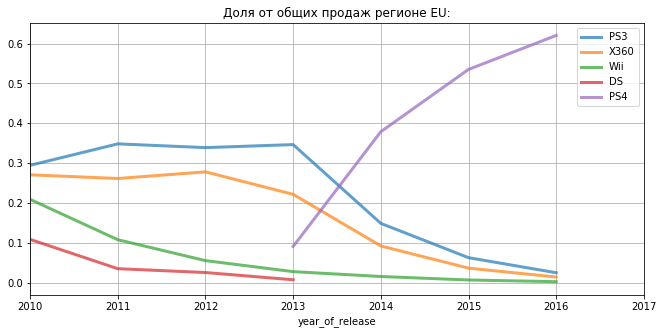

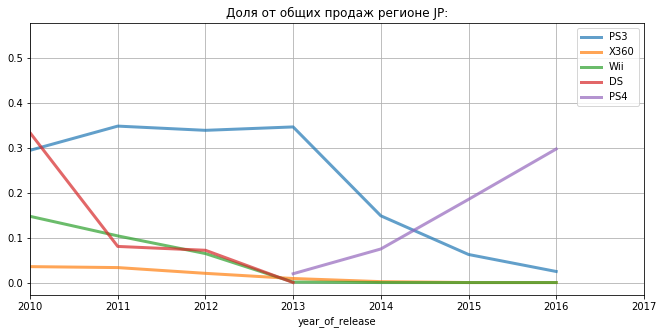

In [24]:
platforms = df[df['year_of_release'] > 2007].groupby('platform').sum().sort_values(by='sales',
                                                     ascending=False)[0:5].reset_index()
for platform in platforms['platform']:
    if platform == platforms['platform'][0]:
        data = df[df['platform'] == platform].groupby('year_of_release').sum().reset_index()
        for year in data['year_of_release'].unique():
            data.loc[data['year_of_release'] == year, 'ratio'] = (
                data.loc[data['year_of_release'] == year, 'na_sales'] / (
                    df[df['year_of_release'] == year]['na_sales'].sum()
                )
            )
        ax = data.plot(
            kind='line',
            x='year_of_release', 
            y='ratio', 
            linewidth=3,
            label=platform,
            title='Доля от общих продаж регионе NA:',
            alpha=.7)
    else:
        data = df[df['platform'] == platform].groupby('year_of_release').sum().reset_index()
        for year in data['year_of_release'].unique():
            data.loc[data['year_of_release'] == year, 'ratio'] = (
                data.loc[data['year_of_release'] == year, 'na_sales'] / (
                    df[df['year_of_release'] == year]['na_sales'].sum()
                )
            )
        data.plot(
            kind='line', 
            x='year_of_release', 
            y='ratio', 
            xlim=(2010, 2017),
            figsize=(11, 5),
            grid=True,
            alpha=.7,
            linewidth=3,
            label=platform,
            ax = ax)

plt.show()

for platform in platforms['platform']:
    if platform == platforms['platform'][0]:
        data = df[df['platform'] == platform].groupby('year_of_release').sum().reset_index()
        for year in data['year_of_release'].unique():
            data.loc[data['year_of_release'] == year, 'ratio'] = (
                data.loc[data['year_of_release'] == year, 'eu_sales'] / (
                    df[df['year_of_release'] == year]['eu_sales'].sum()
                )
            )
        ax = data.plot(
            kind='line',
            x='year_of_release', 
            y='ratio', 
            linewidth=3,
            label=platform,
            title='Доля от общих продаж регионе EU:',
            alpha=.7)
    else:
        data = df[df['platform'] == platform].groupby('year_of_release').sum().reset_index()
        for year in data['year_of_release'].unique():
            data.loc[data['year_of_release'] == year, 'ratio'] = (
                data.loc[data['year_of_release'] == year, 'eu_sales'] / (
                    df[df['year_of_release'] == year]['eu_sales'].sum()
                )
            )
        data.plot(
            kind='line', 
            x='year_of_release', 
            y='ratio', 
            xlim=(2010, 2017),
            figsize=(11, 5),
            grid=True,
            alpha=.7,
            linewidth=3,
            label=platform,
            ax = ax)

plt.show()

for platform in platforms['platform']:
    if platform == platforms['platform'][0]:
        data = df[df['platform'] == platform].groupby('year_of_release').sum().reset_index()
        for year in data['year_of_release'].unique():
            data.loc[data['year_of_release'] == year, 'ratio'] = (
                data.loc[data['year_of_release'] == year, 'eu_sales'] / (
                    df[df['year_of_release'] == year]['eu_sales'].sum()
                )
            )
        ax = data.plot(
            kind='line',
            x='year_of_release', 
            y='ratio', 
            linewidth=3,
            label=platform,
            title='Доля от общих продаж регионе JP:',
            alpha=.7)
    else:
        data = df[df['platform'] == platform].groupby('year_of_release').sum().reset_index()
        for year in data['year_of_release'].unique():
            data.loc[data['year_of_release'] == year, 'ratio'] = (
                data.loc[data['year_of_release'] == year, 'jp_sales'] / (
                    df[df['year_of_release'] == year]['jp_sales'].sum()
                )
            )
        data.plot(
            kind='line', 
            x='year_of_release', 
            y='ratio', 
            xlim=(2010, 2017),
            figsize=(11, 5),
            grid=True,
            alpha=.7,
            linewidth=3,
            label=platform,
            ax = ax)

plt.show()

В 2010-2013 года в регионе NA самая большая доля от общих продаж принадлежала платформе Х360, чуть меньше - PS3. С 2013 года лидирует и созраняет рост платформа PS4. В регионе EU самая большая доля от общих продаж принадлежала платформе PS3, чуть меньше - X360. С 2013 года лидирует и созраняет рост платформа PS4. В регионе JP немного с запозданием, но в общем картина повторяется, за исключением платформы X360: эта платформа не пользовалась популярностью. Продажи X360 были даже меньше, чем Wii, или DS.

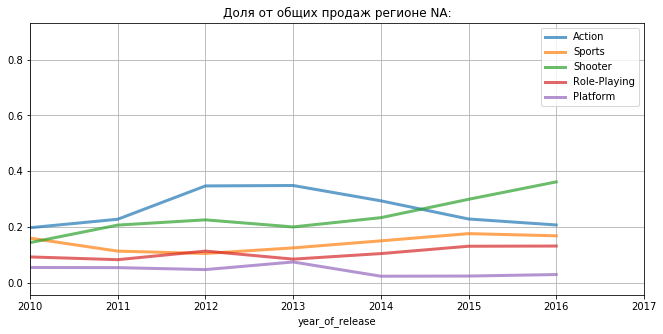

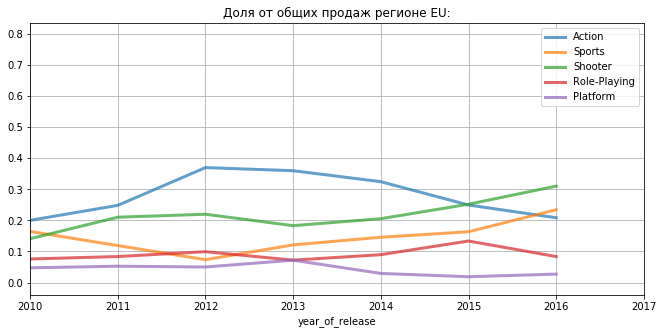

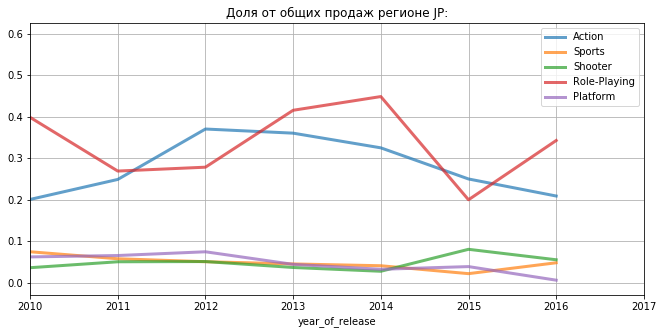

In [25]:
genres = df.groupby('genre').sum().sort_values(by='sales',
                                                     ascending=False)[0:5].reset_index()
for genre in genres['genre']:
    if genre == genres['genre'][0]:
        data = df[df['genre'] == genre].groupby('year_of_release').sum().reset_index()
        for year in data['year_of_release'].unique():
            data.loc[data['year_of_release'] == year, 'ratio'] = (
                data.loc[data['year_of_release'] == year, 'na_sales'] / (
                    df[df['year_of_release'] == year]['na_sales'].sum()
                )
            )
        ax = data.plot(
            kind='line',
            x='year_of_release', 
            y='ratio', 
            linewidth=3,
            label=genre,
            title='Доля от общих продаж регионе NA:',
            alpha=.7)
    else:
        data = df[df['genre'] == genre].groupby('year_of_release').sum().reset_index()
        for year in data['year_of_release'].unique():
            data.loc[data['year_of_release'] == year, 'ratio'] = (
                data.loc[data['year_of_release'] == year, 'na_sales'] / (
                    df[df['year_of_release'] == year]['na_sales'].sum()
                )
            )
        data.plot(
            kind='line', 
            x='year_of_release', 
            y='ratio', 
            xlim=(2010, 2017),
            figsize=(11, 5),
            grid=True,
            alpha=.7,
            linewidth=3,
            label=genre,
            ax = ax)

plt.show()

for genre in genres['genre']:
    if genre == genres['genre'][0]:
        data = df[df['genre'] == genre].groupby('year_of_release').sum().reset_index()
        for year in data['year_of_release'].unique():
            data.loc[data['year_of_release'] == year, 'ratio'] = (
                data.loc[data['year_of_release'] == year, 'eu_sales'] / (
                    df[df['year_of_release'] == year]['eu_sales'].sum()
                )
            )
        ax = data.plot(
            kind='line',
            x='year_of_release', 
            y='ratio', 
            linewidth=3,
            label=genre,
            title='Доля от общих продаж регионе EU:',
            alpha=.7)
    else:
        data = df[df['genre'] == genre].groupby('year_of_release').sum().reset_index()
        for year in data['year_of_release'].unique():
            data.loc[data['year_of_release'] == year, 'ratio'] = (
                data.loc[data['year_of_release'] == year, 'eu_sales'] / (
                    df[df['year_of_release'] == year]['eu_sales'].sum()
                )
            )
        data.plot(
            kind='line', 
            x='year_of_release', 
            y='ratio', 
            xlim=(2010, 2017),
            figsize=(11, 5),
            grid=True,
            alpha=.7,
            linewidth=3,
            label=genre,
            ax = ax)

plt.show()

for genre in genres['genre']:
    if genre == genres['genre'][0]:
        data = df[df['genre'] == genre].groupby('year_of_release').sum().reset_index()
        for year in data['year_of_release'].unique():
            data.loc[data['year_of_release'] == year, 'ratio'] = (
                data.loc[data['year_of_release'] == year, 'eu_sales'] / (
                    df[df['year_of_release'] == year]['eu_sales'].sum()
                )
            )
        ax = data.plot(
            kind='line',
            x='year_of_release', 
            y='ratio', 
            linewidth=3,
            label=genre,
            title='Доля от общих продаж регионе JP:',
            alpha=.7)
    else:
        data = df[df['genre'] == genre].groupby('year_of_release').sum().reset_index()
        for year in data['year_of_release'].unique():
            data.loc[data['year_of_release'] == year, 'ratio'] = (
                data.loc[data['year_of_release'] == year, 'jp_sales'] / (
                    df[df['year_of_release'] == year]['jp_sales'].sum()
                )
            )
        data.plot(
            kind='line', 
            x='year_of_release', 
            y='ratio', 
            xlim=(2010, 2017),
            figsize=(11, 5),
            grid=True,
            alpha=.7,
            linewidth=3,
            label=genre,
            ax = ax)

plt.show()

В регионе NA лидер продаж до 2014 года жанр Action. После - его сменяет Shooter. В регионе EU так же к 2015 году Action теряет лидеоство, но помимо Shooter объёмы продаж выше, чем у Action, набирает жанр Sports. В регионе JP лидеры продаж Role-Playng и Action в большом отрыве от остальных жанров на протяжении всего периода.

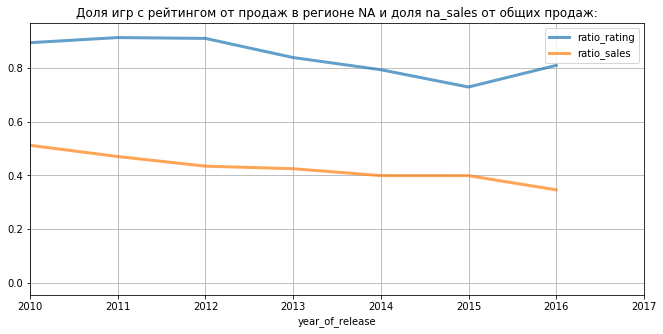

Коэффициент корриляции:
0.05211386188304608


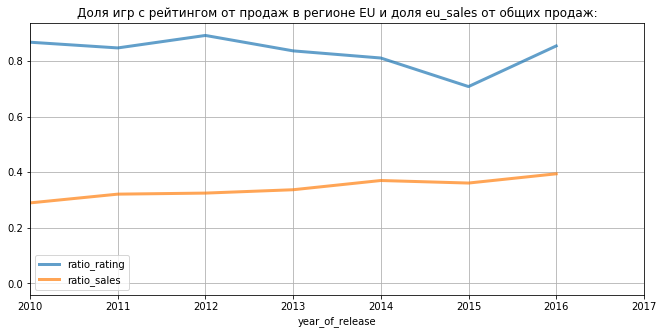

Коэффициент корриляции:
0.7640283336181077


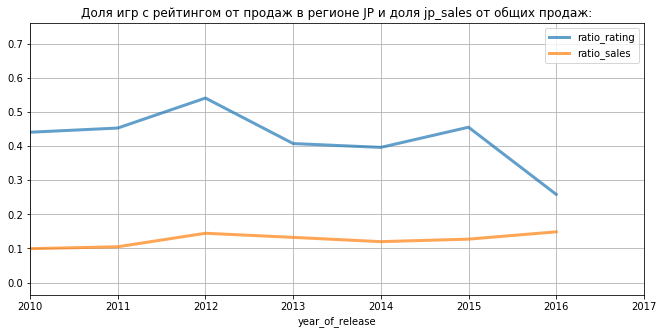

Коэффициент корриляции:
-0.8860822282234501


In [26]:
data = df[~(df['rating'] == 'unrating')].groupby('year_of_release').sum().reset_index()

for year in data['year_of_release'].unique():
    data.loc[data['year_of_release'] == year, 'ratio'] = (
        data.loc[data['year_of_release'] == year, 'na_sales'] / (
            df[df['year_of_release'] == year]['na_sales'].sum()
                )
            )
    
ax = data.plot(
    kind='line',
    x='year_of_release',
    y='ratio',
    linewidth=3,
    label='ratio_rating',
    title='Доля игр с рейтингом от продаж в регионе NA и доля na_sales от общих продаж:',
    alpha=.7)

for year in data['year_of_release'].unique():
    data.loc[data['year_of_release'] == year, 'ratio1'] = (
        df.loc[df['year_of_release'] == year, 'na_sales'].sum() / (
            df[df['year_of_release'] == year]['sales'].sum()
                )
            )
data.plot(
    kind='line',
    x='year_of_release',
    y='ratio1',
    xlim=(2010, 2017),
    figsize=(11, 5),
    grid=True,
    alpha=.7,
    linewidth=3,
    label='ratio_sales',
    ax = ax)

plt.show()

print('Коэффициент корриляции:')
print(data['ratio'].corr(data['ratio1']))

for year in data['year_of_release'].unique():
    data.loc[data['year_of_release'] == year, 'ratio'] = (
        data.loc[data['year_of_release'] == year, 'eu_sales'] / (
            df[df['year_of_release'] == year]['eu_sales'].sum()
                )
            )
    
ax = data.plot(
    kind='line',
    x='year_of_release',
    y='ratio',
    linewidth=3,
    label='ratio_rating',
    title='Доля игр с рейтингом от продаж в регионе EU и доля eu_sales от общих продаж:',
    alpha=.7)

for year in data['year_of_release'].unique():
    data.loc[data['year_of_release'] == year, 'ratio1'] = (
        df.loc[df['year_of_release'] == year, 'eu_sales'].sum() / (
            df[df['year_of_release'] == year]['sales'].sum()
                )
            )
data.plot(
    kind='line',
    x='year_of_release',
    y='ratio1',
    xlim=(2010, 2017),
    figsize=(11, 5),
    grid=True,
    alpha=.7,
    linewidth=3,
    label='ratio_sales',
    ax = ax)

plt.show()

print('Коэффициент корриляции:')
print(data['ratio'].corr(data['ratio1']))

for year in data['year_of_release'].unique():
    data.loc[data['year_of_release'] == year, 'ratio'] = (
        data.loc[data['year_of_release'] == year, 'jp_sales'] / (
            df[df['year_of_release'] == year]['jp_sales'].sum()
                )
            )
    
ax = data.plot(
    kind='line',
    x='year_of_release',
    y='ratio',
    linewidth=3,
    label='ratio_rating',
    title='Доля игр с рейтингом от продаж в регионе JP и доля jp_sales от общих продаж:',
    alpha=.7)

for year in data['year_of_release'].unique():
    data.loc[data['year_of_release'] == year, 'ratio1'] = (
        df.loc[df['year_of_release'] == year, 'jp_sales'].sum() / (
            df[df['year_of_release'] == year]['sales'].sum()
                )
            )
data.plot(
    kind='line',
    x='year_of_release',
    y='ratio1',
    xlim=(2010, 2017),
    figsize=(11, 5),
    grid=True,
    alpha=.7,
    linewidth=3,
    label='ratio_sales',
    ax = ax)

plt.show()

print('Коэффициент корриляции:')
print(data['ratio'].corr(data['ratio1']))

На графиках видно, что доля продаж и доля игр с рейтингом в регионе NA могут изменяться без очевидной зависимости. Коэффициент корреляции гораздо ниже, чем в других регионах. В регионе EU прослеживается положительная зависимоть, а в регионе JP наоборот: с уменьшением доли игр с рейтингом увеличивается доля общих продаж.

## Гипотезы

* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Примем значения user_score в таблице, как выборку из генеральной совокупности оценок пользователей за весь период. Используем специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам scipy.stats.ttest_ind. Нулевая гипотеза сформулирована так: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC разные. Зададим критический уровень статистической значимости alpha = .05. Если в результате теста p-value окажется меньше alpha, отвергним нулевую гипотезу.

In [27]:
alpha = .05

results = (
    st.ttest_ind(df[df['platform'] == 'XOne']['user_score'], 
                 df[df['platform'] == 'PS']['user_score'], 
                 equal_var = True))
print('p-значение: ', results.pvalue.round(4))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не отвергаем нулевую гипотезу.')

p-значение:  0.0
Отвергаем нулевую гипотезу.


Гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые отвергаем.

* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Нулевая гипотеза сформулирована так: Средние пользовательские рейтинги жанров Action и Sports разные. Оставим критический уровень статистической значимости alpha = .05. Если в результате теста p-value окажется больше alpha, отвергним нулевую гипотезу.

In [29]:
results = (
    st.ttest_ind(df[df['genre'] == 'Action']['user_score'], 
                 df[df['genre'] == 'Sports']['user_score'], 
                 equal_var = True))
print('p-значение: ', results.pvalue.round(4))

if results.pvalue > alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не отвергаем нулевую гипотезу.')

p-значение:  0.727
Отвергаем нулевую гипотезу.


## Вывод

Наиболее перспективными платформами в ближайшее время являются PS4 и XOne. Чем выше средний рейтинг игры, тем вероятнее её успешность. Самый распространённый жанр - Action. Самые большие продажи на конец периода приходятся на жанры Action и Shooter. Самые высокие доли успешных игр в жанрах Platform, Simulation, Racing и Fighting. В разных регионах продажи по разному зависят от жанра, платформы, или рейтинга ESRB.